In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## 1. Read Titanic dataset
titanic = pd.read_csv(r"E:\Assignment\python for DataScience L1\titanic_data.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
## 2. Detect missing values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## So fields "Age", "Cabin", "Embarked" has missing values. 
## Number of missing values is shown againt each column. Age column has 177 missing values.

In [7]:
## 3. impute missing values
## Impute missing Age with the Mean value.

In [8]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [9]:
titanic['Age'].isnull().sum()

0

In [10]:
###  Column "Cabin" and "Embarked" is categorical data, so we replace it with most occuring value.
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [12]:
titanic['Embarked'].isnull().sum()

0

In [13]:
titanic['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F33                3
C22 C26            3
E101               3
D                  3
F2                 3
B5                 2
B57 B59 B63 B66    2
F4                 2
E67                2
B22                2
B35                2
B51 B53 B55        2
C65                2
B77                2
D36                2
C83                2
C2                 2
E24                2
C125               2
F G73              2
E44                2
E8                 2
C92                2
C123               2
B28                2
B58 B60            2
C78                2
                  ..
F G63              1
T                  1
C46                1
C85                1
B41                1
E50                1
A32                1
B78                1
B42                1
D19                1
E36                1
E40                1
B37                1
E58                1
A26                1
D56                1
D46          

In [14]:
## we can not replace here with mode value as most the rows have a different value. so we replace it with a new 
#   category - U for Unknown.
titanic['Cabin'].fillna('U',inplace=True)

In [15]:
titanic['Cabin'].isna().sum()

0

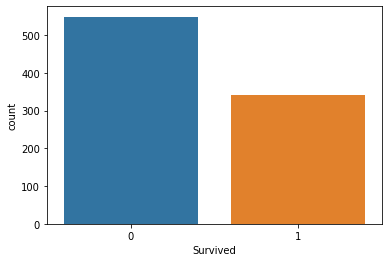

In [16]:
#### 4. Exploring and visualizing data
#Visualize the count of number of survivors (1 - surviver, 0 - NonSurviver)
sns.countplot(titanic['Survived'],label="Count")

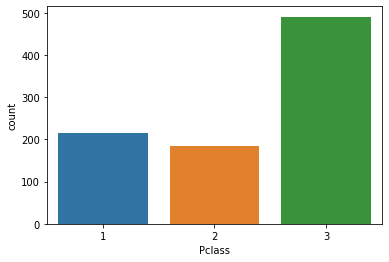

In [17]:
## Bar Plot to show numcer of passesngers travelled by first class, second class and thrid class.
sns.countplot(titanic['Pclass'],label="Count")

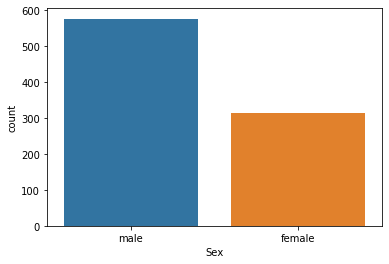

In [18]:
## Barplot to show number of male passengers and Female passengers
sns.countplot(titanic['Sex'],label="Count")

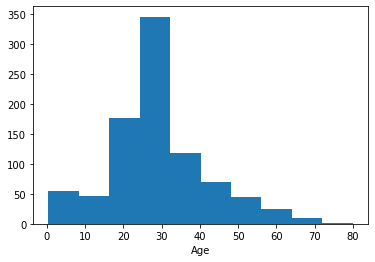

In [19]:
### Histogram of different ages.
# titanic['Age'].hist()
plt.hist(titanic['Age'])
plt.xlabel('Age')
plt.show()

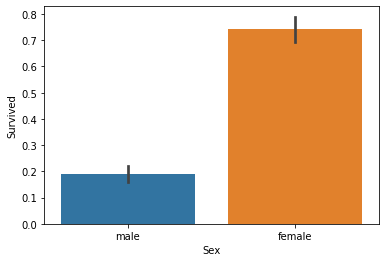

In [20]:
# Passenger survival by gender
# sns.countplot(titanic['Sex'], hue=titanic["Survived"])
sns.barplot(x='Sex', y ='Survived', data=titanic)

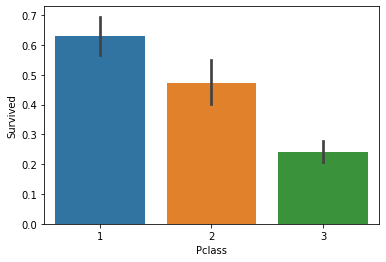

In [21]:
# Passenger survival by class
sns.barplot(x='Pclass', y ='Survived', data=titanic)

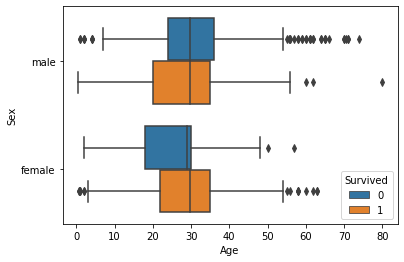

In [22]:
## Box plot to show passenger survival by Age
#sns.boxplot(x='Age', y ='Survived', data=titanic)
sns.boxplot(data=titanic, x='Age', y='Sex', hue ='Survived')

In [23]:
## Visualization
#  5. Sample Superstore
filepath = "E:\Assignment\python for DataScience L1\sample_-_superstore_2.xls"
superstore_df = pd.read_excel(filepath, sheet_name = "Orders")

In [24]:
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
pd.set_option('display.max_columns',0)
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
superstore_df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [27]:
#sub-Category wise profit sum
SubCategogy_profit = superstore_df.groupby('Sub-Category')[['Profit']].sum()
SubCategogy_profit

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


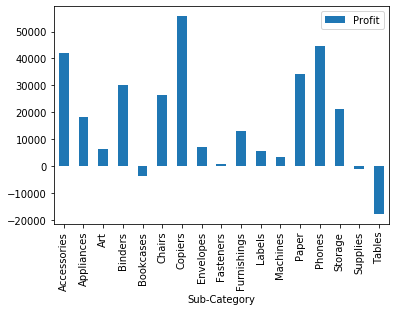

In [28]:
SubCategogy_profit.plot.bar()

In [29]:
### Exclue office furniture sub-category

In [30]:
superstore_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [31]:
# superstore_df.groupby('Category')[['Sub-Category']].count()

In [32]:
superstore_df_Category = superstore_df.loc[superstore_df['Category'] != 'Furniture']
superstore_df_Category['Category'].unique()

array(['Office Supplies', 'Technology'], dtype=object)

In [33]:
superstore_df_Category['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Phones', 'Binders', 'Appliances',
       'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies',
       'Machines', 'Copiers'], dtype=object)

In [34]:
## Sort Sub-Category in descending order
superstore_sort = superstore_df.sort_values(by='Sub-Category',ascending=False)
superstore_sort.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4683,4684,CA-2016-159912,2016-08-29,2016-09-03,Standard Class,GB-14530,George Bell,Corporate,United States,Philadelphia,Pennsylvania,19120,East,FUR-TA-10004152,Furniture,Tables,"Barricks 18"" x 48"" Non-Folding Utility Table w...",241.920,4,0.4,-56.4480
8783,8784,CA-2016-116911,2016-09-15,2016-09-20,Standard Class,JD-16150,Justin Deggeller,Corporate,United States,Twin Falls,Idaho,83301,West,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,1128.390,3,0.0,259.5297
4264,4265,US-2016-131611,2016-11-05,2016-11-09,Standard Class,EP-13915,Emily Phan,Consumer,United States,Houston,Texas,77036,Central,FUR-TA-10002774,Furniture,Tables,Laminate Occasional Tables,863.128,8,0.3,-160.2952
3496,3497,CA-2016-107328,2016-08-08,2016-08-15,Standard Class,CA-12055,Cathy Armstrong,Home Office,United States,Los Angeles,California,90036,West,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",513.024,2,0.2,12.8256
2664,2665,CA-2016-164784,2016-05-01,2016-05-04,First Class,HF-14995,Herbert Flentye,Consumer,United States,Memphis,Tennessee,38109,South,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,370.620,3,0.4,-142.0710


In [35]:
# Categorywise sum of profit in pie chart.
Categogy_profit = superstore_df.groupby('Category')[['Profit']].sum()
Categogy_profit

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002059D4C0EB8>],
      dtype=object)

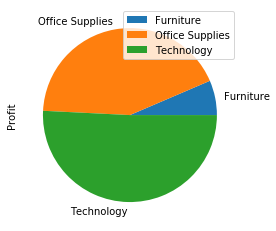

In [36]:
Categogy_profit.plot.pie(subplots=True)

In [37]:
## Line Chart yearwise sum of profit

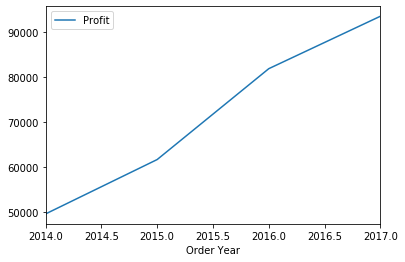

In [38]:
superstore_df['Order Year'] = superstore_df['Order Date'].dt.year
# superstore_df.head()
Year_profit = superstore_df.groupby('Order Year')[['Profit']].sum()
# Year_profit
Year_profit.plot()

In [39]:
# Display Top 10 most profitable customers
Customer_profit = superstore_df.groupby('Customer Name')[['Profit']].sum()
Customer_profit_sort = Customer_profit.sort_values(by='Profit',ascending=False)
Customer_profit_sort[:10]

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055
Tom Ashbrook,4703.7883
Christopher Martinez,3899.8904
Keith Dawkins,3038.6254
Andy Reiter,2884.6208


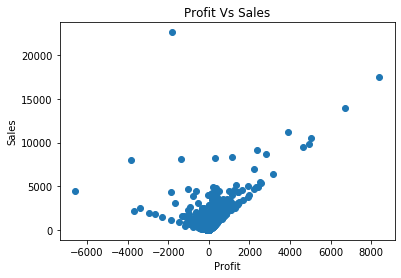

In [40]:
## scatter plot between profit and sales
plt.scatter(superstore_df['Profit'],superstore_df['Sales'])
plt.title('Profit Vs Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

In [41]:
### 6. Create dept dataframe and emp dataframe.

In [42]:
Dept = pd.DataFrame({'Deptno':['A01','B01','C01','D01','E01','F01','G01','H01'],
                     'Dname':['Info Center','Dev Center','Mfg System', 'Admin System','Support Service',
                              'Operations','Software Support','Planning'],
                     'Loc':['First Floor - A Wing','First Floor - B Wing','First Floor - C Wing', 'Second Floor - A Wing',
                           'Second Floor - B Wing', 'Second Floor - C Wing','Third Floor - A Wing', 'Third Floor - B Wing']})
Emp = pd.DataFrame({'Deptno':['A01','B01','B02','C01','D01','E01','E02','G01'],
                     'Eno':['010','020','030','040','050','060','070','080'],
                     'Sal':['40000','80000','60000','45000','50000','70000','65000','75000']})

In [43]:
Emp.head()

,Deptno,Eno,Sal
0,A01,010,40000
1,B01,020,80000
2,B02,030,60000
3,C01,040,45000
4,D01,050,50000


In [44]:
# inner join
Dept_Merge_inner = pd.merge(Dept,Emp,how='inner',on='Deptno')

In [45]:
Dept_Merge_inner

,Deptno,Dname,Loc,Eno,Sal
0,A01,Info Center,First Floor - A Wing,010,40000
1,B01,Dev Center,First Floor - B Wing,020,80000
2,C01,Mfg System,First Floor - C Wing,040,45000
3,D01,Admin System,Second Floor - A Wing,050,50000
4,E01,Support Service,Second Floor - B Wing,060,70000
5,G01,Software Support,Third Floor - A Wing,080,75000


In [46]:
## left outer join
Dept_Merge_leftOuter = pd.merge(Dept,Emp,how='left',on='Deptno')

In [47]:
Dept_Merge_leftOuter

,Deptno,Dname,Loc,Eno,Sal
0,A01,Info Center,First Floor - A Wing,010,40000
1,B01,Dev Center,First Floor - B Wing,020,80000
2,C01,Mfg System,First Floor - C Wing,040,45000
3,D01,Admin System,Second Floor - A Wing,050,50000
4,E01,Support Service,Second Floor - B Wing,060,70000
5,F01,Operations,Second Floor - C Wing,NaN,NaN
6,G01,Software Support,Third Floor - A Wing,080,75000
7,H01,Planning,Third Floor - B Wing,NaN,NaN


In [48]:
## right outer join
Dept_Merge_rightOuter = pd.merge(Dept,Emp,how='right',on='Deptno')
Dept_Merge_rightOuter

,Deptno,Dname,Loc,Eno,Sal
0,A01,Info Center,First Floor - A Wing,010,40000
1,B01,Dev Center,First Floor - B Wing,020,80000
2,C01,Mfg System,First Floor - C Wing,040,45000
3,D01,Admin System,Second Floor - A Wing,050,50000
4,E01,Support Service,Second Floor - B Wing,060,70000
5,G01,Software Support,Third Floor - A Wing,080,75000
6,B02,NaN,NaN,030,60000
7,E02,NaN,NaN,070,65000


In [49]:
## Full outer join
Dept_Merge_Outer = pd.merge(Dept,Emp,how='outer',on='Deptno')
Dept_Merge_Outer

,Deptno,Dname,Loc,Eno,Sal
0,A01,Info Center,First Floor - A Wing,010,40000
1,B01,Dev Center,First Floor - B Wing,020,80000
2,C01,Mfg System,First Floor - C Wing,040,45000
3,D01,Admin System,Second Floor - A Wing,050,50000
4,E01,Support Service,Second Floor - B Wing,060,70000
5,F01,Operations,Second Floor - C Wing,NaN,NaN
6,G01,Software Support,Third Floor - A Wing,080,75000
7,H01,Planning,Third Floor - B Wing,NaN,NaN
8,B02,NaN,NaN,030,60000
9,E02,NaN,NaN,070,65000


In [50]:
#### Descriptive and Inferential Statistics

In [51]:
## 7. We have a normal distrubution with mean 177 cm and standard deviation 10 cm.
#     we have to find the probability of randomly selected man has height more than 200 cm.
#     Lets assume that a random variable X corresponds to height of man selected at random from United Kingdom population.
#     So we have to calculate P (X > 200). For this, first calculate the Z-score of 200 cm.
z = (200 - 177) / 10
print(z)

2.3


In [52]:
## From standard normal distribution table (Z-score table), we find that the area between 0 and 2.3 is 48.93 %
#  P(X > 200) = 0.5 - 0.4893 = 0.0107
#  So the probability of height more than 200 cm for randomly selected man is 0.0107

In [53]:
## 8. Relationship between mileage and horsepower of various cars
mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]

In [54]:
len(mpg)

32

In [55]:
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

In [56]:
len(hp)

32

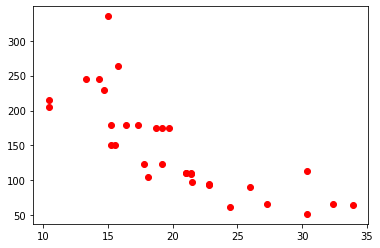

In [57]:
plt.scatter(mpg,hp,color='red')
plt.show()

In [58]:
cov_mat = np.cov(mpg, hp)
cov_mat

array([[  36.32410282, -320.73205645],
       [-320.73205645, 4700.86693548]])

In [59]:
## Covariance between mpg and hp is -320.73. It is negative, suggesting the variables change in the opposite direction. 

In [60]:
corr_pearson = np.corrcoef(mpg, hp)
corr_pearson

array([[ 1.        , -0.77616837],
       [-0.77616837,  1.        ]])

In [61]:
## Correlation coefficient between mpg and hp is -0.77. It suggest the variables are strongly negatively corelated. 

In [62]:
## 9. Perform T-test on two classes

In [63]:
class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

In [64]:
class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])

In [65]:
class1_mean = class1_score.mean()

In [66]:
class2_mean = class2_score.mean()

In [67]:
from scipy import stats

In [68]:
t_stat, p_val = stats.ttest_ind(class1_score, class2_score)
print("T stat = %.2f, P Value = %.2f" %(t_stat, p_val))
if p_val > 0.05:
    print("Same distributions (fail to reject H0)")
else:
    print("Different distributions (reject H0)")

T stat = -5.46, P Value = 0.00
Different distributions (reject H0)


In [69]:
### 11. Pearson correlation coefficient between Girth and Volume in trees dataset
trees = pd.read_csv(r"E:\Assignment\python for DataScience L1\trees.csv")

In [70]:
trees.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [71]:
# correlation = trees['Girth'].corr(trees['Volume'])
correlation = trees[['Girth','Volume']].corr()
correlation

,Girth,Volume
Girth,1.000000,0.967119
Volume,0.967119,1.000000


In [72]:
## the correlation coeff between Girth and Volume in tree is 0.967119 
#   which shows a stong positive relationship between Girth and Volume.

In [73]:
## Scatter plot between tree girth and tree volume.

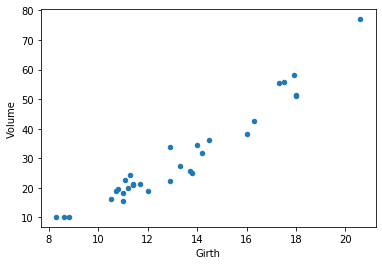

In [74]:
trees.plot.scatter('Girth','Volume')

In [75]:
## 12. hypothesis test to determine the correlation between tree girth and tree volume.

In [76]:
### converting data frame columns to numpy array and apply pearson correlation coefficient.
# trees_girth = trees['Girth'].values
# trees_vol = trees['Volume'].values
# r1, p1 = stats.pearsonr(trees_girth,trees_vol)

In [77]:
r, p = stats.pearsonr(trees['Girth'],trees['Volume'])
print("r=%.3f,p=%.3f" %(r,p))
if p < 0.05:
    print("There is statistically significant correlation between tree girth and tree volume.")
else:
    print("There is no statistically significant correlation between tree girth and tree volume.")

r=0.967,p=0.000
There is statistically significant correlation between tree girth and tree volume.


In [78]:
#### Machine Learning Algorithms ####

In [79]:
## 12. Automobile Price data
AutoPrice = pd.read_csv(r"E:\Assignment\python for DataScience L1\Automobile price data_raw.csv",na_values=['?'])

In [80]:
AutoPrice.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [81]:
AutoPrice.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [82]:
AutoPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [83]:
## Now Impute the missing values for normalized-losses, bore, stroke, , price.
#  Columns num-of-doors, horsepower, peak-rpm have only 2 columns missing, so removing the missing value entry for these columns.

In [84]:
AutoPrice['normalized-losses'].fillna(AutoPrice['normalized-losses'].mean(), inplace=True)
AutoPrice['normalized-losses'].isna().sum()

0

In [85]:
AutoPrice['bore'].fillna(AutoPrice['bore'].mean(), inplace=True)
AutoPrice['bore'].isna().sum()

0

In [86]:
AutoPrice['stroke'].fillna(AutoPrice['stroke'].mean(), inplace=True)
AutoPrice['stroke'].isna().sum()

0

In [87]:
AutoPrice['price'].fillna(AutoPrice['price'].mean(), inplace=True)
AutoPrice['price'].isna().sum()

0

In [88]:
## removing the missing value entry for num-of-doors, horsepower, peak-rpm columns.
AutoPrice_Data = AutoPrice
AutoPrice_Data = AutoPrice_Data.dropna(axis=0, subset=['num-of-doors','peak-rpm','city-mpg'])
AutoPrice_Data.shape

(201, 26)

In [89]:
AutoPrice_Data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [90]:
AutoPrice_Data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.835821,121.870647,98.807960,174.063184,65.908955,53.740299,2558.298507,127.024876,3.329647,3.247670,10.107065,104.467662,5125.870647,25.194030,30.696517,13278.201579
std,1.252162,31.943124,6.065141,12.388068,2.160051,2.441827,525.115435,42.002671,0.272372,0.309699,3.905099,39.809926,479.820136,6.558747,6.908867,7929.832803
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,3.310000,3.270000,9.000000,95.000000,5200.000000,24.000000,30.000000,10698.000000
75%,2.000000,137.000000,102.400000,183.500000,66.900000,55.500000,2952.000000,145.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


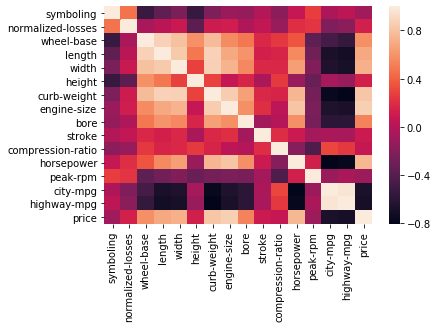

In [91]:
sns.heatmap(AutoPrice_Data.corr())

In [92]:
# Assign independent and dependent variable
X = AutoPrice_Data.iloc[:,:-1]
Y = AutoPrice_Data.iloc[:,-1:].values

In [93]:
# Now perform Label encoding to encode categorical value to numric value.

In [94]:
X = pd.get_dummies(X, drop_first=True)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [97]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred = model.predict(x_test)

In [99]:
model.score(x_test,y_test)

0.6323418640999662

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y_test,y_pred)

0.6323418640999662

In [102]:
### 13. Pima Indian Dataset - Apply Logistic Regression

In [103]:
pima_data = pd.read_excel(r"E:\Assignment\python for DataScience L1\ThePimaIndiansDiabetesBinaryClassificationdataset.csv")

In [104]:
pima_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
pima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                            768 non-null int64
Triceps skin fold thickness (mm)                                            768 non-null int64
2-Hour serum insulin (mu U/ml)                                              768 non-null int64
Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
Diabetes pedigree function                                                  768 non-null float64
Age (years)                                                                 768 non-null int64
Class variable (0 or 1)                                                     768 non-null int64
dtypes: float64(2), int64(7)
memory u

In [106]:
X = pima_data.iloc[:,:-1].values
Y = pima_data.iloc[:,-1].values

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [108]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [110]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred = model.predict(x_test)

In [112]:
score = model.score(x_test,y_test)
print(score)

0.8246753246753247


In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [114]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[98  9]
 [18 29]]


In [115]:
## From the confusion matrx result, we see that out of 154 patients -
#    98 patients are predicted as Not Diabetic and are actually Non-Diabetic (True Negative),
#    29 patients are predicted as Diabetic and are actually Diabetic     (True Positive),
#     9 patients are predicted as Diabetic and are actually Non-Diabetic (False Positive,
#    18 patients are predicted as Non-Diabetic and are actually Diabetic (False Negative).

In [116]:
acc_score = accuracy_score(y_test,y_pred) * 100
print(acc_score)

82.46753246753246


In [117]:
## From the above accuracy score, we see that 82.46 % patients are predicted correctly having diabetic or Non-diabetic.

In [118]:
#### 14. K-means cluster on hotel dataset ####

In [119]:
hotel_data = pd.read_csv(r"E:\Assignment\python for DataScience L1\Hotel.csv",error_bad_lines=False)

In [120]:
hotel_data.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [121]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
address     102 non-null object
lat         102 non-null float64
lon         102 non-null float64
title       102 non-null object
district    102 non-null object
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


In [122]:
# we have to cluster hotel location using k-means
# we are going to cluster hotel location based on latitude, lomgitude and district.

In [123]:
hotel_data['district'].unique()

array(['Beitou', 'Zhongshan', 'Xinyi'], dtype=object)

In [124]:
## Encoding "district" column into numeric
hotel = pd.get_dummies(hotel_data, columns = ['district'], drop_first=True)
hotel.head()

,address,lat,lon,title,district_Xinyi,district_Zhongshan
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,0,0
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,0,1
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),0,0
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,1,0
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,0,1


In [125]:
X = hotel.iloc[:,[1,2,4,5]].values

In [126]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state =0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [127]:
y_pred = km.fit_predict(X)

In [128]:
km.labels_

array([2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [129]:
center = km.cluster_centers_
center

array([[2.50582363e+01, 1.21531500e+02, 2.49800181e-16, 1.00000000e+00],
       [2.50364858e+01, 1.21564558e+02, 1.00000000e+00, 0.00000000e+00],
       [2.51355879e+01, 1.21508662e+02, 0.00000000e+00, 2.22044605e-16]])

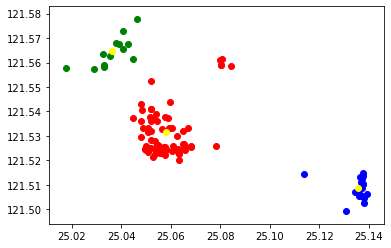

In [130]:
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1], c = 'red')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1], c = 'green')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1], c = 'blue')
plt.scatter(center[:,0],center[:,1], c = 'yellow')
plt.show()